# Exploratory Data Analysis

## Variables Description

- **flight_id**: A unique identifier assigned to each flight.
- **date**: The date when the flight took place.
- **callsign**: The encrypted callsign associated with the flight.
- **adep**: The code of the departure airport.
- **name_adep**: The name of the departure airport.
- **country_code_adep**: The country code of the departure airport.
- **ades**: The code of the destination airport.
- **name_ades**: The name of the destination airport.
- **country_code_ades**: The country code of the destination airport.
- **actual_offblock_time**: The time when the aircraft started to move from its parking position.
- **arrival_time**: The time of arrival at the destination airport.
- **aircraft_type**: The type of aircraft used for the flight.
- **wtc**: The wake turbulence category of the aircraft.
- **airline**: The encrypted identifier of the airline operating the flight.
- **flight_duration**: The duration of the flight in minutes.
- **taxiout_time**: The time spent taxiing out from the departure airport.
- **flown_distance**: The distance flown during the flight in kilometers.
- **tow**: The target variable representing the actual TakeOff Weight (TOW) of the aircraft.

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [46]:
# Load the datasets
challenge_set = pd.read_csv('./data/challenge_set.csv')
submission_set = pd.read_csv('./data/submission_set.csv')

# Display the first few rows of the datasets to understand their structure
challenge_set.head()

,flight_id,date,callsign,adep,name_adep,country_code_adep,ades,name_ades,country_code_ades,actual_offblock_time,arrival_time,aircraft_type,wtc,airline,flight_duration,taxiout_time,flown_distance,tow
0,248763780,2022-01-01,3840d84f25d3f5fcc0a1be3076bb4039,EGLL,London Heathrow,GB,EICK,Cork,IE,2022-01-01T13:46:00Z,2022-01-01T15:04:56Z,A320,M,a73f82288988b79be490c6322f4c32ed,61,18,321,54748.000000
1,248760618,2022-01-01,f6f610e73002b8892a239a81321f7f1d,LEBL,Barcelona,ES,KMIA,Miami,US,2022-01-01T09:55:00Z,2022-01-01T19:37:56Z,B772,H,5543e4dc327359ffaf5b9c0e6faaf0e1,570,13,4193,185441.000000
2,248753824,2022-01-01,139670936660762c230ca92556ba842b,ESSA,Stockholm Arlanda,SE,KORD,Chicago O'Hare,US,2022-01-01T09:39:00Z,2022-01-01T19:08:13Z,A333,H,8be5c854fd664bcb97fb543339f74770,554,15,3770,230396.000000
3,248753852,2022-01-01,509dc61bb54fbab0e5406067c95603e2,LSZH,Zurich,CH,KPHL,Philadelphia,US,2022-01-01T11:04:00Z,2022-01-01T19:32:13Z,B788,H,5543e4dc327359ffaf5b9c0e6faaf0e1,497,11,3607,157615.000000
4,248755934,2022-01-01,d0610d000dcf26b1d7bba8103ecc393d,EIDW,Dublin,IE,EGLL,London Heathrow,GB,2022-01-01T12:36:00Z,2022-01-01T13:44:32Z,A21N,M,a73f82288988b79be490c6322f4c32ed,55,14,305,70318.447226


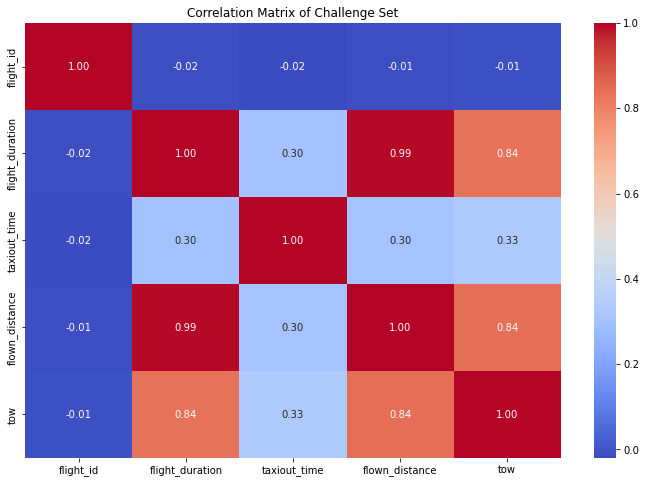

(          flight_id  flight_duration   taxiout_time  flown_distance  \
 count  3.690130e+05    369013.000000  369013.000000   369013.000000   
 mean   2.535220e+08       145.876779      13.489709     1021.728581   
 std    2.688565e+06       139.337587       5.779555     1128.171163   
 min    2.487506e+08         8.000000       0.000000       19.000000   
 25%    2.512296e+08        59.000000      10.000000      338.000000   
 50%    2.536200e+08       100.000000      12.000000      647.000000   
 75%    2.559059e+08       164.000000      16.000000     1113.000000   
 max    2.580745e+08      1013.000000      90.000000     7272.000000   
 
                  tow  
 count  369013.000000  
 mean    79482.257229  
 std     53250.919631  
 min     14944.000000  
 25%     55836.000000  
 50%     63852.000000  
 75%     73756.000000  
 max    351327.000000  ,
 flight_id               0
 date                    0
 callsign                0
 adep                    0
 name_adep               

In [47]:
# Summary statistics of the challenge set
challenge_summary = challenge_set.describe()

# Check for missing values
missing_values = challenge_set.isnull().sum()

# Correlation matrix to check relationships between numerical features
correlation_matrix = challenge_set.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Challenge Set')
plt.show()

# Display the summary statistics and missing values
challenge_summary, missing_values

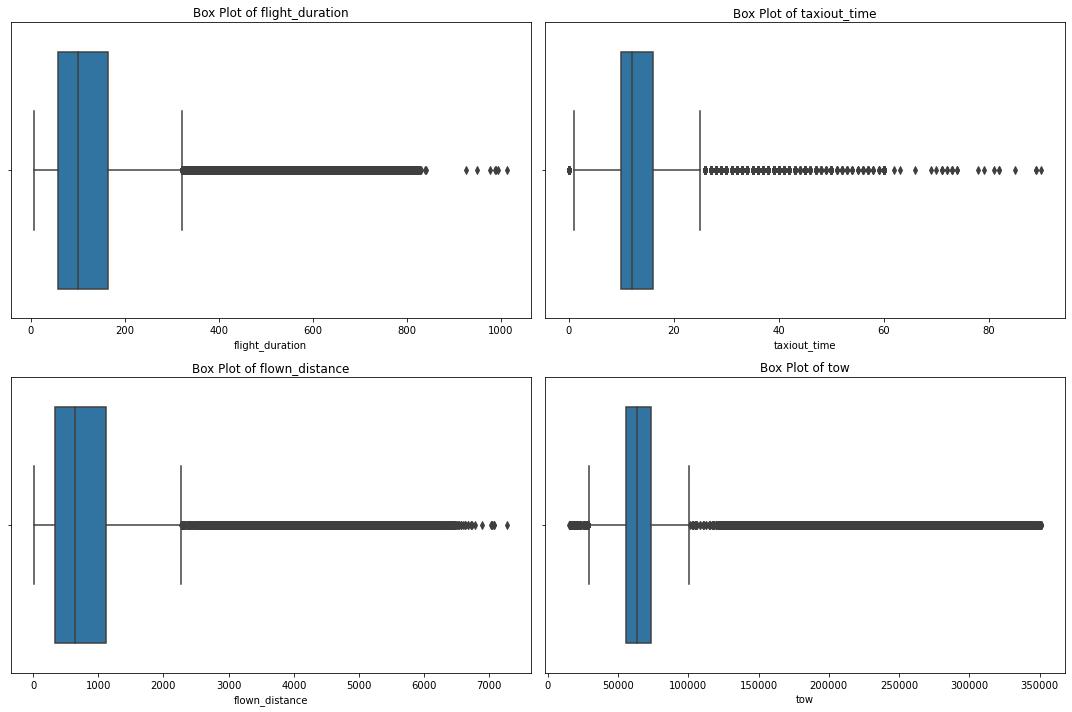

{'flight_duration': 40817,
 'taxiout_time': 10512,
 'flown_distance': 41047,
 'tow': 61165}

In [48]:
# Checking for outliers in numerical features using box plots
numerical_features = ['flight_duration', 'taxiout_time', 'flown_distance', 'tow']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=challenge_set[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Identifying outliers using the Interquartile Range (IQR) method
outliers_info = {}
for feature in numerical_features:
    Q1 = challenge_set[feature].quantile(0.25)
    Q3 = challenge_set[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying outliers
    outliers = challenge_set[(challenge_set[feature] < lower_bound) | (challenge_set[feature] > upper_bound)]
    outliers_info[feature] = len(outliers)

# Displaying the count of outliers for each feature
outliers_info

# # Removing outliers using the IQR threshold
# def remove_outliers(df, features):
#     for feature in features:
#         Q1 = df[feature].quantile(0.25)
#         Q3 = df[feature].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
#     return df

# # Remove outliers from the challenge set
# cleaned_challenge_set = remove_outliers(challenge_set, numerical_features)

# # Checking the shape of the dataset after outlier removal
# initial_count = len(challenge_set)
# cleaned_count = len(cleaned_challenge_set)

# initial_count, cleaned_count, cleaned_challenge_set.describe()

In [49]:
challenge_set.T.head()

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
flight_id,248763780,248760618,248753824,248753852,248755934,248762583,248758528,248752667,248762188,248753189,...,258072846,258057853,258071492,258060782,258067496,258058361,258071247,258059152,258072276,258069969
date,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,...,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31
callsign,3840d84f25d3f5fcc0a1be3076bb4039,f6f610e73002b8892a239a81321f7f1d,139670936660762c230ca92556ba842b,509dc61bb54fbab0e5406067c95603e2,d0610d000dcf26b1d7bba8103ecc393d,e6d5d070016d21108f8bd2bd643202ac,1f51e76bb1001c4f9de991288aacb326,52d1b50f92590b36489a929375be10f6,256265f000acb4a06cd680b3df7c9897,8191fa049d6f1a6cb432a98d97bf960c,...,5ea802e68573752dc98d7623d897a915,b1de87e85987c58b0d29fa4e72e3f961,49c815d2ca2e8c50b01473b12fd30119,92eba53fed3c3914105be1de666ca203,80e0832fdc79cbba84dff5e9e06bb883,85ee68e5b7b5acf24ba00d1318eca1e8,570cf7d5ebbd691bcba63e7466607da7,5a7e43e4f981539ae3d3b1cb31591b7c,a1c078516f9f9e90cacec61854cad45b,6c98fcaa191dec632b87b46511f1d2da
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
name_adep,London Heathrow,Barcelona,Stockholm Arlanda,Zurich,Dublin,Oslo,Belfast City,iGA Istanbul,Los Angeles,iGA Istanbul,...,Rome Fiumicino,London Heathrow,iGA Istanbul,Zurich,Hanover,Paris Charles de Gaulle,iGA Istanbul,Dusseldorf,Paris Charles de Gaulle,Madrid Barajas


In [50]:
# Check unique countries in the 'adep' and 'ades' columns
adep_countries = challenge_set['country_code_adep'].unique()
ades_countries = challenge_set['country_code_ades'].unique()

# Combine both lists to get a unique set of countries
all_countries = set(adep_countries).union(set(ades_countries))

# Display the unique countries
print("Unique countries in cleaned_challenge_set:")
print(sorted(all_countries))

Unique countries in cleaned_challenge_set:
['##', 'AE', 'AL', 'AM', 'AN', 'AO', 'AT', 'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BG', 'BH', 'BJ', 'BR', 'BY', 'CA', 'CD', 'CG', 'CH', 'CI', 'CR', 'CU', 'CV', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EE', 'EG', 'ES', 'ET', 'FI', 'FR', 'GB', 'GE', 'GH', 'GI', 'GR', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KG', 'KR', 'KZ', 'LB', 'LC', 'LR', 'LT', 'LU', 'LV', 'MA', 'MD', 'ME', 'MK', 'MN', 'MT', 'MU', 'MX', 'MY', 'NG', 'NL', 'NO', 'NP', 'OM', 'PA', 'PH', 'PK', 'PL', 'PT', 'QA', 'RO', 'RS', 'RU', 'RW', 'SA', 'SD', 'SE', 'SI', 'SK', 'SL', 'SN', 'SO', 'TH', 'TM', 'TN', 'TR', 'TZ', 'UA', 'US', 'UZ', 'VE', 'VN', 'XK', 'ZA']


In [51]:
# Check unique countries in the 'adep' and 'ades' columns
adep_countries = submission_set['country_code_adep'].unique()
ades_countries = submission_set['country_code_ades'].unique()

# Combine both lists to get a unique set of countries
all_countries_sub = set(adep_countries).union(set(ades_countries))

# Display the unique countries
print("Unique countries in cleaned_challenge_set:")
print(sorted(all_countries_sub))

Unique countries in cleaned_challenge_set:
['##', 'AE', 'AL', 'AM', 'AN', 'AT', 'AZ', 'BA', 'BE', 'BG', 'BH', 'BY', 'CA', 'CH', 'CI', 'CR', 'CU', 'CV', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EE', 'EG', 'ER', 'ES', 'FI', 'FR', 'GB', 'GE', 'GR', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KG', 'KZ', 'LB', 'LC', 'LR', 'LT', 'LU', 'LV', 'MA', 'MD', 'ME', 'MK', 'MN', 'MT', 'MX', 'NL', 'NO', 'OM', 'PA', 'PK', 'PL', 'PT', 'QA', 'RO', 'RS', 'RU', 'SA', 'SE', 'SI', 'SK', 'SL', 'SN', 'TH', 'TM', 'TN', 'TR', 'TZ', 'UA', 'US', 'UZ', 'XK', 'ZA']


In [52]:
set(all_countries_sub) - set(all_countries)

{'ER'}

In [53]:
def extract_time_features(df):
    # Converting datetime strings to datetime objects
    df['actual_offblock_time'] = pd.to_datetime(df['actual_offblock_time'])
    df['arrival_time'] = pd.to_datetime(df['arrival_time'])
    
    # Extracting basic time features
    df['offblock_hour'] = df['actual_offblock_time'].dt.hour
    df['offblock_minute'] = df['actual_offblock_time'].dt.minute
    df['offblock_day_of_week'] = df['actual_offblock_time'].dt.dayofweek
    df['offblock_month'] = df['actual_offblock_time'].dt.month
    # df['offblock_day_of_year'] = df['actual_offblock_time'].dt.dayofyear
    df['offblock_week_of_year'] = df['actual_offblock_time'].dt.isocalendar().week
    df['offblock_season'] = df['offblock_month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 
                                                       'Spring' if x in [3, 4, 5] else
                                                       'Summer' if x in [6, 7, 8] else 'Fall')
    
    df['arrival_hour'] = df['arrival_time'].dt.hour
    df['arrival_minute'] = df['arrival_time'].dt.minute

    # Calculating the duration in minutes between offblock and arrival
    df['offblock_to_arrival_duration'] = (df['arrival_time'] - df['actual_offblock_time']).dt.total_seconds() / 60
    
    # Adding boolean flags for weekends and rush hours
    df['is_offblock_weekend'] = df['offblock_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    df['is_offblock_rush_hour'] = df['offblock_hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 18 else 0)
    
    return df

# Creating additional duration-based features
def create_duration_features(df):
    # Replace zero or negative values in flight_duration to avoid division errors
    df['flight_duration'] = df['flight_duration'].replace(0, np.nan)
    df['taxiout_time'] = df['taxiout_time'].replace(0, np.nan)
    
    # Calculating the ratio of taxiout time to flight duration with error handling
    df['taxi_ratio'] = df.apply(lambda row: row['taxiout_time'] / row['flight_duration'] 
                                if pd.notnull(row['taxiout_time']) and pd.notnull(row['flight_duration']) else np.nan, axis=1)
    
    # Calculating the average flight speed (distance per minute) with error handling
    df['flight_speed'] = df.apply(lambda row: row['flown_distance'] / row['flight_duration'] 
                                  if pd.notnull(row['flown_distance']) and pd.notnull(row['flight_duration']) else np.nan, axis=1)
    
    # Normalizing taxi_ratio by the median value to control for large values
    df['normalized_taxi_ratio'] = df['taxi_ratio'] / df['taxi_ratio'].median()
    
    # Categorical features for flight duration buckets
    df['flight_duration_category'] = pd.cut(df['flight_duration'], bins=[0, 60, 180, 300, np.inf], 
                                            labels=['Very Short', 'Short', 'Medium', 'Long'], right=False)
    
    # Speed per distance feature for more detailed analysis
    df['speed_per_distance'] = df.apply(lambda row: row['flight_speed'] / row['flown_distance'] 
                                        if pd.notnull(row['flight_speed']) and pd.notnull(row['flown_distance']) else np.nan, axis=1)
    
    # Cumulative mean of flight speed to capture trends over time (if data is ordered by time)
    df['cumulative_avg_speed'] = df['flight_speed'].expanding().mean()
    
    # Handling edge cases and setting up conditions for further analysis
    df['taxi_ratio'] = df['taxi_ratio'].replace([np.inf, -np.inf], np.nan)
    df['flight_speed'] = df['flight_speed'].replace([np.inf, -np.inf], np.nan)
    
    return df

# Grouping airports by region based on country codes
def group_airports_by_region(df):
    # Define country groups for regions
    europe_countries = ['GB', 'FR', 'DE', 'ES', 'IT', 'SE', 'CH', 'NL', 'AT', 'IE', 'BE', 'DK', 'FI', 'GR', 'HU', 
                        'IS', 'LT', 'LU', 'LV', 'MT', 'NO', 'PL', 'PT', 'RO', 'SI', 'SK', 'CZ', 'EE', 'BG', 'CY']
    north_america_countries = ['US', 'CA', 'MX']
    south_america_countries = ['BR', 'AR', 'CL', 'CO', 'PE', 'VE', 'UY', 'PY', 'BO', 'EC', 'GY', 'SR']
    middle_east_countries = ['AE', 'SA', 'IL', 'IR', 'IQ', 'JO', 'KW', 'OM', 'QA', 'BH', 'LB', 'SY', 'YE']
    asia_countries = ['JP', 'CN', 'KR', 'IN', 'PK', 'BD', 'VN', 'PH', 'TH', 'MY', 'ID', 'SG', 'MN', 'KZ', 'TM', 'UZ', 'KG']
    africa_countries = ['ZA', 'NG', 'EG', 'DZ', 'MA', 'KE', 'TZ', 'GH', 'ET', 'CI', 'SN', 'SD', 'AO', 'LR', 'RW', 'ER']
    other_countries = set(df['country_code_adep'].unique()).union(set(df['country_code_ades'].unique())) - set(europe_countries + 
                       north_america_countries + south_america_countries + middle_east_countries + asia_countries + africa_countries)

    # Apply region categorization based on country codes
    def categorize_region(code):
        if code in europe_countries:
            return 'Europe'
        elif code in north_america_countries:
            return 'North America'
        elif code in south_america_countries:
            return 'South America'
        elif code in middle_east_countries:
            return 'Middle East'
        elif code in asia_countries:
            return 'Asia'
        elif code in africa_countries:
            return 'Africa'
        elif code in other_countries:
            return 'Other'
        else:
            return 'Unknown'

    # Apply region classification for adep and ades
    df['adep_region'] = df['country_code_adep'].apply(categorize_region)
    df['ades_region'] = df['country_code_ades'].apply(categorize_region)

    return df

# Update functions to remove original columns where applicable
def extract_country_features(df):
    # Basic feature indicating if the flight is within the same country
    df['same_country_flight'] = (df['country_code_adep'] == df['country_code_ades']).astype(int)

    # Feature indicating if the flight is within the same region
    df['same_region_flight'] = (df['adep_region'] == df['ades_region']).astype(int)

    # Flight direction based on regions: North-South, East-West, or Other
    df['flight_direction'] = df.apply(lambda row: 'North-South' if row['adep_region'] in ['North America', 'Europe'] and
                                                      row['ades_region'] in ['South America', 'Africa'] else
                                                      'East-West' if row['adep_region'] in ['Europe', 'Asia'] and 
                                                      row['ades_region'] in ['North America'] else 'Other', axis=1)

    # Create a feature indicating if the flight is intercontinental
    intercontinental_regions = ['Europe', 'North America', 'South America', 'Middle East', 'Asia', 'Africa']
    df['is_intercontinental'] = df.apply(
        lambda row: 1 if row['adep_region'] in intercontinental_regions and 
                         row['ades_region'] in intercontinental_regions and 
                         row['adep_region'] != row['ades_region'] else 0, axis=1)
    return df

# Function to remove original columns after feature extraction
def remove_columns(df, columns_to_remove):
    # Removing original datetime columns since features have been extracted
    df = df.drop(columns_to_remove, axis=1)
    return df

# List of columns to remove after feature extraction
columns_to_remove = ['name_adep', 'name_ades', 'country_code_adep', 'country_code_ades', 'flight_id', 'callsign', 'date', 'actual_offblock_time', 'arrival_time', 'flight_duration']

# Applying functions to the challenge set
cleaned_challenge_set = extract_time_features(challenge_set)
cleaned_challenge_set = create_duration_features(cleaned_challenge_set)
cleaned_challenge_set = group_airports_by_region(cleaned_challenge_set)
cleaned_challenge_set = extract_country_features(cleaned_challenge_set)
cleaned_challenge_set = remove_columns(cleaned_challenge_set, columns_to_remove)

# Applying functions to the submission set
cleaned_submission_set = extract_time_features(submission_set)
cleaned_submission_set = create_duration_features(cleaned_submission_set)
cleaned_submission_set = group_airports_by_region(cleaned_submission_set)
cleaned_submission_set = extract_country_features(cleaned_submission_set)
cleaned_submission_set = remove_columns(cleaned_submission_set, columns_to_remove)

# Display the transposed first few rows of the updated challenge set for review
cleaned_challenge_set.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
taxiout_time,18.0,13.0,15.0,11.0,14.0,27.0,10.0,25.0,10.0,25.0,...,18.0,19.0,25.0,9.0,8.0,21.0,25.0,11.0,12.0,16.0
flown_distance,321,4193,3770,3607,305,1434,295,458,6354,257,...,726,449,975,782,416,4046,946,522,466,3213
tow,54748.0,185441.0,230396.0,157615.0,70318.447226,57721.0,56818.0,60678.0,235632.0,73571.0,...,61804.035897,72756.0,73571.0,64826.0,40868.0,163438.0,78707.0,62942.75,72611.161024,195373.0
offblock_hour,13,9,9,11,12,10,7,5,21,15,...,9,9,9,9,9,9,9,9,9,9
offblock_minute,46,55,39,4,36,24,41,21,26,0,...,47,52,34,39,42,38,27,52,37,38


In [54]:
# Load the GlobalAirportDatabase.txt into a DataFrame
columns_global = ['ICAO', 'IATA', 'Airport Name', 'City/Town', 'Country', 
                  'Latitude Degrees', 'Latitude Minutes', 'Latitude Seconds', 'Latitude Direction',
                  'Longitude Degrees', 'Longitude Minutes', 'Longitude Seconds', 'Longitude Direction',
                  'Altitude', 'Latitude Decimal Degrees', 'Longitude Decimal Degrees']
global_airports = pd.read_csv('./extra_data/GlobalAirportDatabase.txt', sep=':', header=None, names=columns_global)

# Select relevant columns including Altitude (ICAO, Latitude Decimal Degrees, Longitude Decimal Degrees, Altitude)
global_airports = global_airports[['ICAO', 'Latitude Decimal Degrees', 'Longitude Decimal Degrees', 'Altitude']]

# Load the airports.dat file (assuming previous naming and structure)
columns_openflights = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 
                       'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 
                       'Type', 'Source']
openflights_airports = pd.read_csv('./extra_data/airports.dat', header=None, names=columns_openflights)

# Select relevant columns including Altitude (ICAO, Latitude Decimal Degrees, Longitude Decimal Degrees, Altitude)
openflights_airports = openflights_airports[['ICAO', 'Latitude', 'Longitude', 'Altitude']]
openflights_airports.rename(columns={'Latitude': 'Latitude Decimal Degrees', 
                                     'Longitude': 'Longitude Decimal Degrees'}, inplace=True)

# Concatenate both datasets, removing duplicates based on ICAO codes
airports = pd.concat([global_airports, openflights_airports]).drop_duplicates(subset=['ICAO'])

# Display the combined dataset to verify the merge
airports.head()

,ICAO,Latitude Decimal Degrees,Longitude Decimal Degrees,Altitude
0,AYGA,-6.082,145.392,1610
1,AYLA,0.000,0.000,0
2,AYMD,-5.207,145.789,7
3,AYMH,-5.826,144.296,1643
4,AYNZ,-6.570,146.726,73


In [55]:
# Backup
backup_challenge_set = cleaned_challenge_set.copy()

# Merge airports data to cleaned_challenge_set for both departure (adep) and arrival (ades) airports

# Merge for adep (departure airport)
cleaned_challenge_set = pd.merge(
    cleaned_challenge_set, airports, 
    how='left', left_on='adep', right_on='ICAO', 
    suffixes=('_adep', '')
)

# Rename latitude, longitude, and altitude columns for adep correctly
cleaned_challenge_set.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_adep', 
        'Longitude Decimal Degrees': 'Longitude_adep',
        'Altitude': 'Altitude_adep'
    }, 
    inplace=True
)

# Merge for ades (arrival airport)
cleaned_challenge_set = pd.merge(
    cleaned_challenge_set, airports, 
    how='left', left_on='ades', right_on='ICAO', 
    suffixes=('', '_ades')
)

# Rename latitude, longitude, and altitude columns for ades correctly
cleaned_challenge_set.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_ades', 
        'Longitude Decimal Degrees': 'Longitude_ades',
        'Altitude': 'Altitude_ades'
    }, 
    inplace=True
)

# Display the transposed DataFrame to confirm the correct columns are retained
cleaned_challenge_set.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
taxiout_time,18.0,13.0,15.0,11.0,14.0,27.0,10.0,25.0,10.0,25.0,...,18.0,19.0,25.0,9.0,8.0,21.0,25.0,11.0,12.0,16.0
flown_distance,321,4193,3770,3607,305,1434,295,458,6354,257,...,726,449,975,782,416,4046,946,522,466,3213
tow,54748.0,185441.0,230396.0,157615.0,70318.447226,57721.0,56818.0,60678.0,235632.0,73571.0,...,61804.035897,72756.0,73571.0,64826.0,40868.0,163438.0,78707.0,62942.75,72611.161024,195373.0
offblock_hour,13,9,9,11,12,10,7,5,21,15,...,9,9,9,9,9,9,9,9,9,9
offblock_minute,46,55,39,4,36,24,41,21,26,0,...,47,52,34,39,42,38,27,52,37,38


In [56]:
# Count missing values for each column in the cleaned_challenge_set DataFrame
missing_values = cleaned_challenge_set.isnull().sum()

# Identify columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Specifically count the unique missing ICAO codes by examining columns related to ICAO information
# Assuming 'adep' and 'ades' are the columns where ICAO codes are merged
missing_icaos_adep = cleaned_challenge_set[cleaned_challenge_set['Latitude_adep'].isnull()]['adep'].unique()
missing_icaos_ades = cleaned_challenge_set[cleaned_challenge_set['Latitude_ades'].isnull()]['ades'].unique()

# Combine both lists to find unique ICAO codes missing in both 'adep' and 'ades'
unique_missing_icaos = set(missing_icaos_adep).union(set(missing_icaos_ades))

# Count the number of unique ICAO codes missing
unique_missing_count = len(unique_missing_icaos)

unique_missing_count, unique_missing_icaos

(9, {'HSSK', 'LFTM', 'LTFG', 'LTFO', 'UCFM', 'UTFF', 'VGHS', 'VOGO', 'ZMCK'})

In [57]:
# Display rows in the DataFrame that have missing values in any column
rows_with_missing_values = cleaned_challenge_set[cleaned_challenge_set.isnull().any(axis=1)]

# Display the rows with missing values
rows_with_missing_values.T

,827,6483,6849,7043,7363,7601,8408,8762,9030,9099,...,359940,362848,363027,363328,363911,365546,365578,366051,366634,366810
adep,LIMF,LTFM,LTFM,CYYZ,LTAL,UCFM,LTFM,UCFM,UCFM,UCFM,...,UAAA,OERK,LEMD,LTFM,OERK,OERK,UCFM,OERK,ORSU,OERK
ades,EIDW,UCFM,UCFM,LTFM,LTFM,LTFM,UCFM,LTFM,LTFM,LTFM,...,LTFM,LTFJ,LSZH,LOWW,LTFJ,LTFM,LTFM,LTFM,LTFM,LTFM
aircraft_type,B738,A21N,A21N,B77W,B738,A21N,A21N,A21N,A21N,A21N,...,B38M,B738,BCS3,A321,B738,A21N,A21N,A21N,A321,A21N
wtc,M,M,M,H,M,M,M,M,M,M,...,M,M,M,M,M,M,M,M,M,M
airline,3922524069809ac4326134429751e26f,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b
taxiout_time,NaN,16.0,16.0,NaN,NaN,NaN,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flown_distance,775,2138,2195,4523,272,2164,2177,2134,2162,2100,...,2295,1582,699,724,1569,1582,2181,1604,888,1607
tow,65907.0,88781.0,84781.0,300614.0,52907.0,82914.0,86665.0,84914.0,81914.0,78914.0,...,75915.0,68907.0,48942.0,78880.0,72907.0,80914.0,86914.0,78914.0,71880.0,79914.0
offblock_hour,11,0,23,3,10,5,22,5,5,1,...,5,1,13,6,1,23,6,4,9,4
offblock_minute,41,5,5,44,45,30,19,10,0,20,...,37,45,46,19,31,24,36,8,55,30


In [58]:
# Applying the same transformations for submission_set as described for challenge_set

# Backup
backup_submission_set = cleaned_submission_set.copy()

# Filter updated_airports to include only ICAO codes present in cleaned_submission_set (adep and ades)
relevant_icaos_submission = cleaned_submission_set['adep'].unique().tolist() + cleaned_submission_set['ades'].unique().tolist()
filtered_airports_submission = airports[airports['ICAO'].isin(relevant_icaos_submission)]

# Merge airports data to submission_set for both departure (adep) and arrival (ades) airports
# Merge for adep (departure airport)
cleaned_submission_set = pd.merge(
    cleaned_submission_set, filtered_airports_submission, 
    how='left', left_on='adep', right_on='ICAO', 
    suffixes=('_adep', '')
)

# Rename latitude, longitude, and altitude columns for adep correctly
cleaned_submission_set.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_adep', 
        'Longitude Decimal Degrees': 'Longitude_adep',
        'Altitude': 'Altitude_adep'
    }, 
    inplace=True
)

# Merge for ades (arrival airport)
cleaned_submission_set = pd.merge(
    cleaned_submission_set, filtered_airports_submission, 
    how='left', left_on='ades', right_on='ICAO', 
    suffixes=('', '_ades')
)

# Rename latitude, longitude, and altitude columns for ades correctly
cleaned_submission_set.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_ades', 
        'Longitude Decimal Degrees': 'Longitude_ades',
        'Altitude': 'Altitude_ades'
    }, 
    inplace=True
)

cleaned_submission_set.T

,0,1,2,3,4,5,6,7,8,9,...,105949,105950,105951,105952,105953,105954,105955,105956,105957,105958
adep,LTFJ,EBBR,KMIA,EGCN,EIDW,LTFJ,EGLL,LSZH,EGLL,LEMD,...,BKPR,LTFJ,KORD,KJFK,KSFO,LTFJ,LOWW,LTFM,EHAM,UBBB
ades,LFLL,KJFK,EGLL,LEAL,LFLL,LTAC,EIDW,EDDH,EICK,EIDW,...,LSGG,LFLL,EGLL,LEBL,EIDW,EKCH,KIAD,LSZH,EDDF,LTFM
aircraft_type,B738,A333,B77W,B38M,A320,B738,A320,A320,A320,A320,...,BCS3,B738,B789,B772,A333,B38M,B763,A321,A320,B738
wtc,M,H,H,M,M,M,M,M,M,M,...,M,M,H,H,H,M,H,M,M,M
airline,6351ec1b849adacc0cbb3b1313d8d39b,bdeeef3a675587d530de70a25d7118d2,5543e4dc327359ffaf5b9c0e6faaf0e1,3922524069809ac4326134429751e26f,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,2d5def0a5a844b343ba1b7cc9cb28fa9,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,...,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,5543e4dc327359ffaf5b9c0e6faaf0e1,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,5d407cb11cc29578cc3e292e743f5393,6351ec1b849adacc0cbb3b1313d8d39b,f502877cab405652cf0dd70c2213e730,6351ec1b849adacc0cbb3b1313d8d39b
taxiout_time,15.0,15.0,10.0,10.0,15.0,15.0,10.0,9.0,15.0,11.0,...,5.0,15.0,25.0,35.0,10.0,15.0,14.0,25.0,9.0,10.0
flown_distance,1122,3205,3965,986,686,239,251,415,321,806,...,744,1160,3540,3437,4595,1199,3937,988,240,1014
tow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offblock_hour,9,9,1,8,11,14,16,11,9,10,...,9,9,0,23,2,9,9,9,10,9
offblock_minute,44,45,52,20,1,36,17,47,5,57,...,25,20,1,48,12,36,49,25,4,40


In [59]:
# Count missing values for each column in the submission_set_updated DataFrame
missing_values_submission = cleaned_submission_set.isnull().sum()

# Identify columns with missing values
columns_with_missing_submission = missing_values_submission[missing_values_submission > 0]

# Specifically count the unique missing ICAO codes by examining columns related to ICAO information
missing_icaos_adep_submission = cleaned_submission_set[cleaned_submission_set['Latitude_adep'].isnull()]['adep'].unique()
missing_icaos_ades_submission = cleaned_submission_set[cleaned_submission_set['Latitude_ades'].isnull()]['ades'].unique()

# Combine both lists to find unique ICAO codes missing in both 'adep' and 'ades'
unique_missing_icaos_submission = set(missing_icaos_adep_submission).union(set(missing_icaos_ades_submission))

# Count the number of unique ICAO codes missing
unique_missing_count_submission = len(unique_missing_icaos_submission)

unique_missing_count_submission, unique_missing_icaos_submission

(6, {'LTFG', 'LTFO', 'UCFM', 'UTFF', 'VOGO', 'ZMCK'})

In [60]:
# Coordinates for the given ICAO codes

new_airports = {
    'ICAO': ['CYHZ', 'EDDE', 'KDAB', 'KRFD', 'LIPO', 'LTAP', 'HSSK', 'LFTM', 'LTFG', 
             'LTFO', 'UCFM', 'UTFF', 'VGHS', 'VOGO', 'ZMCK'],
    'Latitude Decimal Degrees': [44.8800, 50.9798, 29.1799, 42.1954, 45.4289, 40.0714, 
                                 15.5895, 40.9769, 36.2994, 38.7262, 43.0613, 40.3581, 
                                 23.8433, 15.3808, 48.1357],
    'Longitude Decimal Degrees': [-63.5086, 10.9581, -81.0581, -89.0972, 10.3306, 32.5644, 
                                  32.5532, 28.8146, 32.3006, 30.6015, 74.4776, 71.7450, 
                                  90.3978, 73.8314, 114.6460],
    'Altitude': [145, 316, 11, 224, 109, 535, 386, 35, 28, 1003, 627, 577, 8, 56, 751]
}

# Convert new airports data to DataFrame
new_airports_df = pd.DataFrame(new_airports)

# Append the new rows to the existing DataFrame
updated_airports = pd.concat([airports, new_airports_df], ignore_index=True)

updated_airports = updated_airports.drop_duplicates(subset=['ICAO'])

In [61]:
# Filter updated_airports to include only ICAO codes present in df (adep and ades)
relevant_icaos_challenge = backup_challenge_set['adep'].unique().tolist() + backup_challenge_set['ades'].unique().tolist()
filtered_airports_challenge = updated_airports[updated_airports['ICAO'].isin(relevant_icaos_challenge)]

# Merge airports data to cleaned_challenge_set for both departure (adep) and arrival (ades) airports
# Merge for adep (departure airport)
challenge_set_updated = pd.merge(
    backup_challenge_set, filtered_airports_challenge, 
    how='left', left_on='adep', right_on='ICAO', 
    suffixes=('_adep', '')
)

# Rename latitude, longitude, and altitude columns for adep correctly
challenge_set_updated.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_adep', 
        'Longitude Decimal Degrees': 'Longitude_adep',
        'Altitude': 'Altitude_adep'
    }, 
    inplace=True
)

# Merge for ades (arrival airport)
challenge_set_updated = pd.merge(
    challenge_set_updated, filtered_airports_challenge, 
    how='left', left_on='ades', right_on='ICAO', 
    suffixes=('', '_ades')
)

# Rename latitude, longitude, and altitude columns for ades correctly
challenge_set_updated.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_ades', 
        'Longitude Decimal Degrees': 'Longitude_ades',
        'Altitude': 'Altitude_ades'
    }, 
    inplace=True)


# Display the transposed DataFrame to confirm the correct columns are retained
challenge_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
adep,EGLL,LEBL,ESSA,LSZH,EIDW,ENGM,EGAC,LTFM,KLAX,LTFM,...,LIRF,EGLL,LTFM,LSZH,EDDV,LFPG,LTFM,EDDL,LFPG,LEMD
ades,EICK,KMIA,KORD,KPHL,EGLL,LEAL,EGLL,LYBE,LTFM,LTAC,...,EBBR,LSZH,LIMC,LGTS,LOWW,KMIA,EDDB,EIDW,EIDW,KJFK
aircraft_type,A320,B772,A333,B788,A21N,A20N,A320,B738,B789,A321,...,A320,A21N,A321,A320,E195,B788,A21N,A320,A21N,B772
wtc,M,H,H,H,M,M,M,M,H,M,...,M,M,M,M,M,H,M,M,M,H
airline,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1,8be5c854fd664bcb97fb543339f74770,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,8be5c854fd664bcb97fb543339f74770,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,6351ec1b849adacc0cbb3b1313d8d39b,...,bdeeef3a675587d530de70a25d7118d2,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,2d5def0a5a844b343ba1b7cc9cb28fa9,5d407cb11cc29578cc3e292e743f5393,5543e4dc327359ffaf5b9c0e6faaf0e1,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,5543e4dc327359ffaf5b9c0e6faaf0e1
taxiout_time,18.0,13.0,15.0,11.0,14.0,27.0,10.0,25.0,10.0,25.0,...,18.0,19.0,25.0,9.0,8.0,21.0,25.0,11.0,12.0,16.0
flown_distance,321,4193,3770,3607,305,1434,295,458,6354,257,...,726,449,975,782,416,4046,946,522,466,3213
tow,54748.0,185441.0,230396.0,157615.0,70318.447226,57721.0,56818.0,60678.0,235632.0,73571.0,...,61804.035897,72756.0,73571.0,64826.0,40868.0,163438.0,78707.0,62942.75,72611.161024,195373.0
offblock_hour,13,9,9,11,12,10,7,5,21,15,...,9,9,9,9,9,9,9,9,9,9
offblock_minute,46,55,39,4,36,24,41,21,26,0,...,47,52,34,39,42,38,27,52,37,38


In [62]:
# Count missing values for each column in the cleaned_challenge_set DataFrame
missing_values = challenge_set_updated.isnull().sum()

# Identify columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Specifically count the unique missing ICAO codes by examining columns related to ICAO information
# Assuming 'adep' and 'ades' are the columns where ICAO codes are merged
missing_icaos_adep = challenge_set_updated[challenge_set_updated['Latitude_adep'].isnull()]['adep'].unique()
missing_icaos_ades = challenge_set_updated[challenge_set_updated['Latitude_ades'].isnull()]['ades'].unique()

# Combine both lists to find unique ICAO codes missing in both 'adep' and 'ades'
unique_missing_icaos = set(missing_icaos_adep).union(set(missing_icaos_ades))

# Count the number of unique ICAO codes missing
unique_missing_count = len(unique_missing_icaos)

unique_missing_count, unique_missing_icaos

(0, set())

In [63]:
# Applying the same transformations for submission_set as described for challenge_set

# Filter updated_airports to include only ICAO codes present in df (adep and ades)
relevant_icaos_submission = backup_submission_set['adep'].unique().tolist() + backup_submission_set['ades'].unique().tolist()
filtered_airports_submission = updated_airports[updated_airports['ICAO'].isin(relevant_icaos_submission)]

# Merge airports data to submission_set for both departure (adep) and arrival (ades) airports
# Merge for adep (departure airport)
submission_set_updated = pd.merge(
    backup_submission_set, filtered_airports_submission, 
    how='left', left_on='adep', right_on='ICAO', 
    suffixes=('_adep', '')
)

# Rename latitude, longitude, and altitude columns for adep correctly
submission_set_updated.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_adep', 
        'Longitude Decimal Degrees': 'Longitude_adep',
        'Altitude': 'Altitude_adep'
    }, 
    inplace=True
)

# Merge for ades (arrival airport)
submission_set_updated = pd.merge(
    submission_set_updated, filtered_airports_submission, 
    how='left', left_on='ades', right_on='ICAO', 
    suffixes=('', '_ades')
)

# Rename latitude, longitude, and altitude columns for ades correctly
submission_set_updated.rename(
    columns={
        'Latitude Decimal Degrees': 'Latitude_ades', 
        'Longitude Decimal Degrees': 'Longitude_ades',
        'Altitude': 'Altitude_ades'
    }, 
    inplace=True
)

submission_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,105949,105950,105951,105952,105953,105954,105955,105956,105957,105958
adep,LTFJ,EBBR,KMIA,EGCN,EIDW,LTFJ,EGLL,LSZH,EGLL,LEMD,...,BKPR,LTFJ,KORD,KJFK,KSFO,LTFJ,LOWW,LTFM,EHAM,UBBB
ades,LFLL,KJFK,EGLL,LEAL,LFLL,LTAC,EIDW,EDDH,EICK,EIDW,...,LSGG,LFLL,EGLL,LEBL,EIDW,EKCH,KIAD,LSZH,EDDF,LTFM
aircraft_type,B738,A333,B77W,B38M,A320,B738,A320,A320,A320,A320,...,BCS3,B738,B789,B772,A333,B38M,B763,A321,A320,B738
wtc,M,H,H,M,M,M,M,M,M,M,...,M,M,H,H,H,M,H,M,M,M
airline,6351ec1b849adacc0cbb3b1313d8d39b,bdeeef3a675587d530de70a25d7118d2,5543e4dc327359ffaf5b9c0e6faaf0e1,3922524069809ac4326134429751e26f,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,a73f82288988b79be490c6322f4c32ed,2d5def0a5a844b343ba1b7cc9cb28fa9,a73f82288988b79be490c6322f4c32ed,a73f82288988b79be490c6322f4c32ed,...,2d5def0a5a844b343ba1b7cc9cb28fa9,6351ec1b849adacc0cbb3b1313d8d39b,5543e4dc327359ffaf5b9c0e6faaf0e1,5543e4dc327359ffaf5b9c0e6faaf0e1,a73f82288988b79be490c6322f4c32ed,6351ec1b849adacc0cbb3b1313d8d39b,5d407cb11cc29578cc3e292e743f5393,6351ec1b849adacc0cbb3b1313d8d39b,f502877cab405652cf0dd70c2213e730,6351ec1b849adacc0cbb3b1313d8d39b
taxiout_time,15.0,15.0,10.0,10.0,15.0,15.0,10.0,9.0,15.0,11.0,...,5.0,15.0,25.0,35.0,10.0,15.0,14.0,25.0,9.0,10.0
flown_distance,1122,3205,3965,986,686,239,251,415,321,806,...,744,1160,3540,3437,4595,1199,3937,988,240,1014
tow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offblock_hour,9,9,1,8,11,14,16,11,9,10,...,9,9,0,23,2,9,9,9,10,9
offblock_minute,44,45,52,20,1,36,17,47,5,57,...,25,20,1,48,12,36,49,25,4,40


In [64]:
# Count missing values for each column in the submission_set_updated DataFrame
missing_values_submission = submission_set_updated.isnull().sum()

# Identify columns with missing values
columns_with_missing_submission = missing_values_submission[missing_values_submission > 0]

# Specifically count the unique missing ICAO codes by examining columns related to ICAO information
missing_icaos_adep_submission = submission_set_updated[submission_set_updated['Latitude_adep'].isnull()]['adep'].unique()
missing_icaos_ades_submission = submission_set_updated[submission_set_updated['Latitude_ades'].isnull()]['ades'].unique()

# Combine both lists to find unique ICAO codes missing in both 'adep' and 'ades'
unique_missing_icaos_submission = set(missing_icaos_adep_submission).union(set(missing_icaos_ades_submission))

# Count the number of unique ICAO codes missing
unique_missing_count_submission = len(unique_missing_icaos_submission)

unique_missing_count_submission, unique_missing_icaos_submission

(0, set())

In [65]:
# Function to calculate actual distance between airports using Haversine formula
def calculate_actual_distance(df):
    # Convert degrees to radians
    lat1 = np.radians(df['Latitude_adep'])
    lon1 = np.radians(df['Longitude_adep'])
    lat2 = np.radians(df['Latitude_ades'])
    lon2 = np.radians(df['Longitude_ades'])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius_earth_km = 6371  # Earth radius in kilometers
    df['actual_distance'] = radius_earth_km * c
    
    # Additional features
    df['altitude_difference'] = df['Altitude_ades'] - df['Altitude_adep']  # Vertical distance
    df['bearing'] = np.degrees(np.arctan2(np.sin(dlon) * np.cos(lat2), 
                                           np.cos(lat1) * np.sin(lat2) - 
                                           np.sin(lat1) * np.cos(lat2) * np.cos(dlon)))  # Bearing
    
    df['bearing'] = (df['bearing'] + 360) % 360  # Normalize bearing to 0-360 degrees
    df['elevation_gradient'] = df['altitude_difference'] / df['actual_distance']  # Altitude change per km
    
    return df

# Apply the actual distance calculation and additional features to the challenge set
challenge_set_updated = calculate_actual_distance(challenge_set_updated)
challenge_set_updated = challenge_set_updated.drop(['ICAO', 'ICAO_ades'], axis=1)

# Apply the actual distance calculation and additional features to the submission set
submission_set_updated = calculate_actual_distance(submission_set_updated)
submission_set_updated = submission_set_updated.drop(['ICAO', 'ICAO_ades'], axis=1)

In [66]:
# List of categorical columns to analyze
categorical_columns = ['aircraft_type', 
                       'wtc', 
                       'airline',
                       'offblock_hour',
                       'offblock_minute', 
                       'offblock_day_of_week',
                       'offblock_month',
                       # 'offblock_day_of_year',
                       'offblock_week_of_year', 
                       'offblock_season', 
                       'arrival_hour',
                       'arrival_minute',
                       'is_offblock_weekend',
                       'is_offblock_rush_hour',
                       'flight_duration_category',                       
                       'adep_region', 
                       'ades_region', 
                       'same_country_flight',
                       'same_region_flight',                        
                       'flight_direction',
                       'is_intercontinental']

# Calculate the number of unique values for each categorical column efficiently
unique_variations = challenge_set_updated[categorical_columns].nunique()

# Display the number of variations for each categorical variable
unique_variations

aircraft_type               30
wtc                          2
airline                     29
offblock_hour               24
offblock_minute             60
offblock_day_of_week         7
offblock_month              12
offblock_week_of_year       52
offblock_season              4
arrival_hour                24
arrival_minute              60
is_offblock_weekend          2
is_offblock_rush_hour        2
flight_duration_category     4
adep_region                  7
ades_region                  7
same_country_flight          2
same_region_flight           2
flight_direction             3
is_intercontinental          2
dtype: int64

In [67]:
# Extract airports from both datasets
challenge_airports = set(challenge_set_updated['adep']).union(set(challenge_set_updated['ades']))
submission_airports = set(submission_set_updated['adep']).union(set(submission_set_updated['ades']))

# Find airports in challenge_set_updated that are not in submission_set_updated
airports_only_in_challenge = challenge_airports - submission_airports

# Find airports in submission_set_updated that are not in challenge_set_updated
airports_only_in_submission = submission_airports - challenge_airports

# Display the results
print("Airports in challenge_set_updated that are not in submission_set_updated:")
print(airports_only_in_challenge)

print("\nAirports in submission_set_updated that are not in challenge_set_updated:")
print(airports_only_in_submission)


Airports in challenge_set_updated that are not in submission_set_updated:
{'LECH', 'FZAA', 'UTNU', 'LTCU', 'VNKT', 'EPKT', 'OPIS', 'OMDW', 'FIMP', 'LEGR', 'LXGB', 'LTAS', 'SVMI', 'CYUL', 'WADD', 'VTBS', 'RKSI', 'CYFB', 'HCMM', 'LPAZ', 'HSSK', 'UTTT', 'LJMB', 'EDSB', 'EFOU', 'KTUL', 'KNYL', 'KFLL', 'EYKA', 'CYYT', 'FNLU', 'TNCA', 'LIEA', 'USSS', 'UKHH', 'DGAA', 'GMTA', 'LEZG', 'HRYR', 'GMFK', 'EFKI', 'EDFH', 'LCRA', 'LFCR', 'HAAB', 'EGJJ', 'EPMO', 'EDLW', 'SBGR', 'EGHL', 'TBPB', 'EDLV', 'KPAE', 'WMKK', 'GCXO', 'OPKC', 'DBBB', 'KGSP', 'LTFC', 'EFIV', 'KOMA', 'OMAA', 'UGSB', 'UTSB', 'FAOR', 'DNMM', 'LGBL', 'RPLL', 'LFTM', 'VVTS', 'LFTW', 'LIMJ', 'VGHS', 'LFRH', 'LRBS', 'LDRI', 'FCPP'}

Airports in submission_set_updated that are not in challenge_set_updated:
{'ESKN', 'KDAB', 'MMPR', 'LFBH', 'RJTT', 'EFET', 'LKTB', 'DAOO', 'LTCM', 'LKMT', 'KRFD', 'LEAB', 'HHAS'}


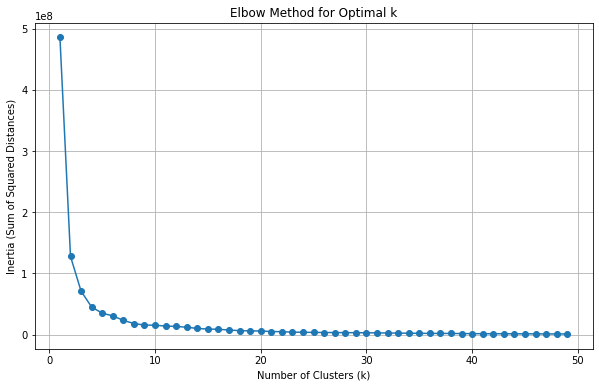

In [68]:
# Clustering based on geographical coordinates for challenge_set_updated

# Extract coordinates for adep and ades
adep_coords = challenge_set_updated[['Latitude_adep', 'Longitude_adep']].values
ades_coords = challenge_set_updated[['Latitude_ades', 'Longitude_ades']].values

# Combine all coordinates for clustering
combined_coords = np.vstack((adep_coords, ades_coords))

# Calculate inertia for each k value in the specified range
inertia = []
k_range = range(1, 50)  # Testing cluster sizes from 1 to 50

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_coords)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
        
# Automatically determining the optimal k using the "elbow" point
# Finding the point where the reduction in inertia slows down significantly
optimal_k = 1  # Default to 1 cluster if no elbow is detected
threshold_ratio = 0.01  # Define a threshold for identifying the elbow point

# Checking for the point where inertia reduction starts to slow down
for i in range(1, len(inertia) - 1):
    if (inertia[i - 1] - inertia[i]) > (inertia[i] - inertia[i + 1]) * threshold_ratio:
        optimal_k = i + 1
        break

In [69]:
# Apply K-means clustering on combined coordinates
kmeans_geo = KMeans(n_clusters=20, random_state=42)  
kmeans_geo.fit(combined_coords)

# Assign cluster labels back to adep and ades separately
adep_geo_labels = kmeans_geo.predict(adep_coords)
ades_geo_labels = kmeans_geo.predict(ades_coords)

# Map cluster labels to the original dataframe
challenge_set_updated['adep_geo_cluster'] = adep_geo_labels
challenge_set_updated['ades_geo_cluster'] = ades_geo_labels

In [70]:
# Clustering based on geographical coordinates for submission_set_updated

# Extract coordinates for adep and ades from submission_set_updated
adep_coords_submission = submission_set_updated[['Latitude_adep', 'Longitude_adep']].values
ades_coords_submission = submission_set_updated[['Latitude_ades', 'Longitude_ades']].values

# Assign cluster labels back to adep and ades separately for submission_set_updated
adep_geo_labels_submission = kmeans_geo.predict(adep_coords_submission)
ades_geo_labels_submission = kmeans_geo.predict(ades_coords_submission)

# Map cluster labels to the submission_set_updated dataframe
submission_set_updated['adep_geo_cluster'] = adep_geo_labels_submission
submission_set_updated['ades_geo_cluster'] = ades_geo_labels_submission

In [71]:
# Automatically identify categorical variables in the DataFrame
categorical_columns_auto = challenge_set_updated.select_dtypes(include=['object', 'category']).columns.tolist()

# Calculate the number of unique values for each automatically identified categorical column
unique_variations_auto = challenge_set_updated[categorical_columns_auto].nunique()

# Display the identified categorical variables and their number of unique variations
unique_variations_auto

adep                        460
ades                        367
aircraft_type                30
wtc                           2
airline                      29
offblock_season               4
flight_duration_category      4
adep_region                   7
ades_region                   7
flight_direction              3
dtype: int64

In [72]:
# List of categorical columns to analyze
categorical_columns = ['aircraft_type', 
                       'wtc', 
                       'airline',
                       'offblock_hour',
                       'offblock_minute', 
                       'offblock_day_of_week',
                       'offblock_month',
                       # 'offblock_day_of_year',
                       'offblock_week_of_year', 
                       'offblock_season', 
                       'arrival_hour',
                       'arrival_minute',
                       'is_offblock_weekend',
                       'is_offblock_rush_hour',
                       'flight_duration_category',                       
                       'adep_region', 
                       'ades_region', 
                       'same_country_flight',
                       'same_region_flight',                        
                       'flight_direction',
                       'is_intercontinental',
                       'adep_geo_cluster',
                       'ades_geo_cluster']

# Calculate the number of unique values for each categorical column efficiently
unique_variations = challenge_set_updated[categorical_columns].nunique()

# Display the number of variations for each categorical variable
unique_variations

aircraft_type               30
wtc                          2
airline                     29
offblock_hour               24
offblock_minute             60
offblock_day_of_week         7
offblock_month              12
offblock_week_of_year       52
offblock_season              4
arrival_hour                24
arrival_minute              60
is_offblock_weekend          2
is_offblock_rush_hour        2
flight_duration_category     4
adep_region                  7
ades_region                  7
same_country_flight          2
same_region_flight           2
flight_direction             3
is_intercontinental          2
adep_geo_cluster            20
ades_geo_cluster            20
dtype: int64

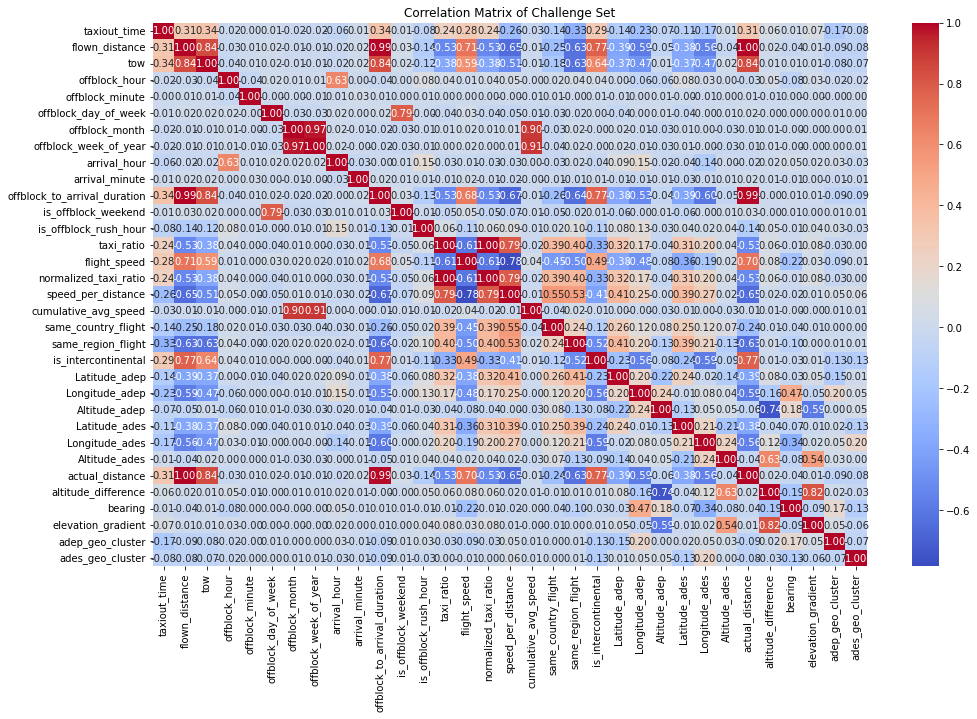

(        taxiout_time  flown_distance            tow  offblock_hour  \
 count  368452.000000   369013.000000  369013.000000  369013.000000   
 mean       13.510248     1021.728581   79482.257229      11.440814   
 std         5.759916     1128.171163   53250.919631       5.244718   
 min         1.000000       19.000000   14944.000000       0.000000   
 25%        10.000000      338.000000   55836.000000       7.000000   
 50%        12.000000      647.000000   63852.000000      11.000000   
 75%        16.000000     1113.000000   73756.000000      16.000000   
 max        90.000000     7272.000000  351327.000000      23.000000   
 
        offblock_minute  offblock_day_of_week  offblock_month  \
 count    369013.000000         369013.000000   369013.000000   
 mean         29.161043              3.014929        6.943579   
 std          17.593646              2.010830        3.183737   
 min           0.000000              0.000000        1.000000   
 25%          14.000000           

In [73]:
# Summary statistics of the challenge set
challenge_summary = challenge_set_updated.describe()

# Check for missing values
missing_values = challenge_set_updated.isnull().sum()

# Correlation matrix to check relationships between numerical features
correlation_matrix = challenge_set_updated.corr()

# Plotting the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Challenge Set')
plt.show()

# Display the summary statistics and missing values
challenge_summary, missing_values

In [74]:
# Function to rearrange the dataframe so that the target variable 'tow' is the last column
def rearrange_columns(df):
    # Moving 'tow' to the last position
    columns = [col for col in df.columns if col != 'tow'] + ['tow']
    df = df[columns]
    return df

# # Remove some categorical columns
new_columns_to_remove = ['adep', 'ades', 'actual_distance']
challenge_set_updated = remove_columns(challenge_set_updated, new_columns_to_remove)
submission_set_updated = remove_columns(submission_set_updated, new_columns_to_remove)

# List of categorical columns to encode
categorical_columns = ['aircraft_type', 
                       'wtc', 
                       'airline',
                       'offblock_hour',
                       'offblock_minute', 
                       'offblock_day_of_week',
                       'offblock_month',
                       # 'offblock_day_of_year',
                       'offblock_week_of_year', 
                       'offblock_season', 
                       'arrival_hour',
                       'arrival_minute',
                       'is_offblock_weekend',
                       'is_offblock_rush_hour',
                       'flight_duration_category',                       
                       'adep_region', 
                       'ades_region', 
                       'same_country_flight',
                       'same_region_flight',                        
                       'flight_direction',
                       'is_intercontinental',
                       'adep_geo_cluster',
                       'ades_geo_cluster']

# Apply One-Hot Encoding to the training set
challenge_set_updated = pd.get_dummies(challenge_set_updated, columns=categorical_columns, drop_first=True)

# Apply One-Hot Encoding to the test set
submission_set_updated = pd.get_dummies(submission_set_updated, columns=categorical_columns, drop_first=True)

# Align the test set columns with the training set columns
# Identify missing columns and create a DataFrame with those columns set to zero
missing_cols = set(challenge_set_updated.columns) - set(submission_set_updated.columns)
missing_cols_df = pd.DataFrame(0, index=submission_set_updated.index, columns=missing_cols)

# Concatenate the missing columns DataFrame with the test set
submission_set_updated = pd.concat([submission_set_updated, missing_cols_df], axis=1)

# Drop extra columns in the test set that are not in the training set
extra_cols = set(submission_set_updated.columns) - set(challenge_set_updated.columns)
submission_set_updated.drop(columns=extra_cols, inplace=True)

# Reorder the columns of the test set to match the training set
submission_set_updated = submission_set_updated[challenge_set_updated.columns]

# Rearrange columns
challenge_set_updated = rearrange_columns(challenge_set_updated)
submission_set_updated = rearrange_columns(submission_set_updated)


In [78]:
missing_cols

{'adep_region_South America',
 'ades_region_South America',
 'aircraft_type_A310',
 'aircraft_type_C56X',
 'airline_154acc473ac7d5991245125f4ff6b3a6',
 'airline_310d41975a1e6b9b51ca356414d67daf',
 'airline_415bb6c2faf8f0aa7b4108deeec9869c',
 'airline_588c4a7c5b7320c61a6c4227be465964',
 'airline_6a681ee572c1e4e981cdab3c55b4b422',
 'airline_72ba06dd5ae13526df103042ce4c535e',
 'airline_b37a3f3161e6ec4cffbb65e7ebf4ecfe',
 'airline_cc0752e0930c0f501873a342d96c13f0',
 'airline_ecae30f8b0a678b4e97d1f7307642d2b'}

In [79]:
extra_cols

{'airline_e5b13da1511ff741c34c94cfd5575c55'}

In [75]:
challenge_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,369003,369004,369005,369006,369007,369008,369009,369010,369011,369012
taxiout_time,18.000000,13.000000,15.000000,11.000000,14.000000,27.000000,10.000000,25.000000,10.000000,25.000000,...,18.000000,19.000000,25.000000,9.000000,8.000000,21.000000,25.000000,11.000000,12.000000,16.000000
flown_distance,321.000000,4193.000000,3770.000000,3607.000000,305.000000,1434.000000,295.000000,458.000000,6354.000000,257.000000,...,726.000000,449.000000,975.000000,782.000000,416.000000,4046.000000,946.000000,522.000000,466.000000,3213.000000
offblock_to_arrival_duration,78.933333,582.933333,569.216667,508.216667,68.533333,240.683333,67.316667,104.466667,749.000000,69.000000,...,131.933333,82.866667,174.900000,117.966667,67.000000,565.800000,182.683333,109.850000,96.166667,468.583333
taxi_ratio,0.295082,0.022807,0.027076,0.022133,0.254545,0.126168,0.175439,0.316456,0.013532,0.568182,...,0.157895,0.296875,0.166667,0.082569,0.135593,0.038532,0.158228,0.111111,0.142857,0.035320
flight_speed,5.262295,7.356140,6.805054,7.257545,5.545455,6.700935,5.175439,5.797468,8.598106,5.840909,...,6.368421,7.015625,6.500000,7.174312,7.050847,7.423853,5.987342,5.272727,5.547619,7.092715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ades_geo_cluster_16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ades_geo_cluster_17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ades_geo_cluster_18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ades_geo_cluster_19,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
submission_set_updated.T

,0,1,2,3,4,5,6,7,8,9,...,105949,105950,105951,105952,105953,105954,105955,105956,105957,105958
taxiout_time,15.000000,15.000000,10.000000,10.000000,15.000000,15.000000,10.000000,9.000000,15.000000,11.000000,...,5.000000,15.000000,25.000000,35.000000,10.000000,15.000000,14.000000,25.000000,9.000000,10.000000
flown_distance,1122.000000,3205.000000,3965.000000,986.000000,686.000000,239.000000,251.000000,415.000000,321.000000,806.000000,...,744.000000,1160.000000,3540.000000,3437.000000,4595.000000,1199.000000,3937.000000,988.000000,240.000000,1014.000000
offblock_to_arrival_duration,184.550000,484.850000,483.266667,166.133333,119.716667,56.000000,57.733333,72.666667,78.350000,122.366667,...,127.666667,194.900000,437.250000,431.400000,574.050000,216.283333,589.433333,179.400000,51.233333,168.000000
taxi_ratio,0.088235,0.031915,0.021142,0.064103,0.142857,0.365854,0.208333,0.140625,0.238095,0.099099,...,0.040650,0.083333,0.060680,0.088384,0.017730,0.074627,0.024348,0.162338,0.214286,0.063291
flight_speed,6.600000,6.819149,8.382664,6.320513,6.533333,5.829268,5.229167,6.484375,5.095238,7.261261,...,6.048780,6.444444,8.592233,8.679293,8.147163,5.965174,6.846957,6.415584,5.714286,6.417722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ades_geo_cluster_16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ades_geo_cluster_17,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ades_geo_cluster_18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ades_geo_cluster_19,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [77]:
challenge_set_updated.to_csv('./data/challenge_set_updated_v5.csv', index=False)
submission_set_updated.to_csv('./data/submission_set_updated_v5.csv', index=False)